# Estimating the parameters of a simulated black hole binary source

In [2]:
pip install -q 'lalsuite==7.24'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.0 MB/s eta 0:00:00


In [1]:
# installing pycbc
pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
from pycbc import frame

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [46]:
#reading the .gwf files having strain data for three interferometers
H1_data = frame.read_frame('PE.gwf', 'H1:FAKE_STRAIN')
L1_data = frame.read_frame('PE.gwf', 'L1:FAKE_STRAIN')
V1_data = frame.read_frame('PE.gwf', 'V1:FAKE_STRAIN')

In [5]:
pip install -q 'bilby==2.4.0' 'gwpy==3.0.8'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.1/940.1 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.2 MB/s eta 0:00:00


In [6]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

import bilby
from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries

In [47]:
# setting up empty interferometers
H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")
V1 = bilby.gw.detector.get_empty_interferometer("V1")

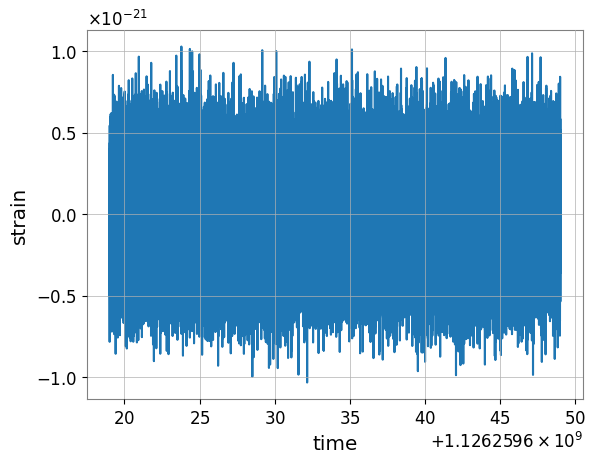

In [48]:
# plotting strain data
H1_data.plot()
plt.xlabel('time')
plt.ylabel('strain')
plt.show()

In [49]:
# As pycbc was not working on my local machine, the data files were saved as .txt and converted to gwpy timeseries later for use
H1_data.save('H1_data.txt')
L1_data.save('L1_data.txt')
V1_data.save('V1_data.txt')


In [50]:
# converting to gwpy timeseries
H1_data = TimeSeries(H1_data, sample_rate=4096)
L1_data = TimeSeries(L1_data, sample_rate=4096)
V1_data = TimeSeries(V1_data, sample_rate=4096)

In [51]:
H1.set_strain_data_from_gwpy_timeseries(H1_data)
L1.set_strain_data_from_gwpy_timeseries(L1_data)
V1.set_strain_data_from_gwpy_timeseries(V1_data)

In [52]:
from pycbc.waveform import get_td_waveform

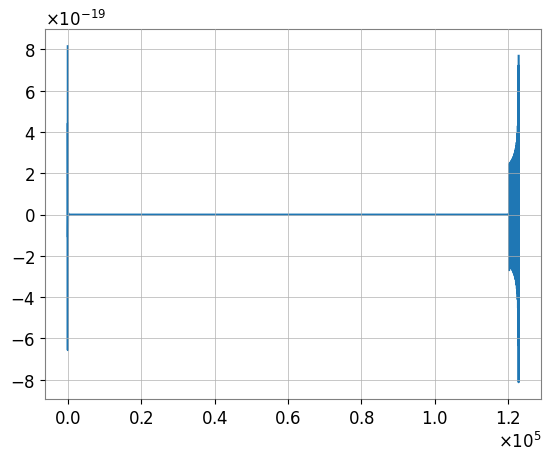

In [25]:

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=35,
                     mass2=35,
                     delta_t=1/4096,
                     f_lower=20)
# estimating the waveform (using average masses - each 35 solar mass)

# We will resize the vector to match our data
hp.resize(len(H1_data))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the
# first bin of the data.

# This function rotates the vector by a fixed amount of time.
# It treats the data as if it were on a ring. Note that
# time stamps are *not* in general affected, but the true
# position in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to
# shift the merger into position
template = hp.cyclic_time_shift(hp.start_time)
plt.plot(template)
plt.show()

In [53]:
H1_data = frame.read_frame('PE.gwf', 'H1:FAKE_STRAIN')

from pycbc.psd import welch, interpolate
psd = interpolate(welch(H1_data), 1.0 / H1_data.duration)

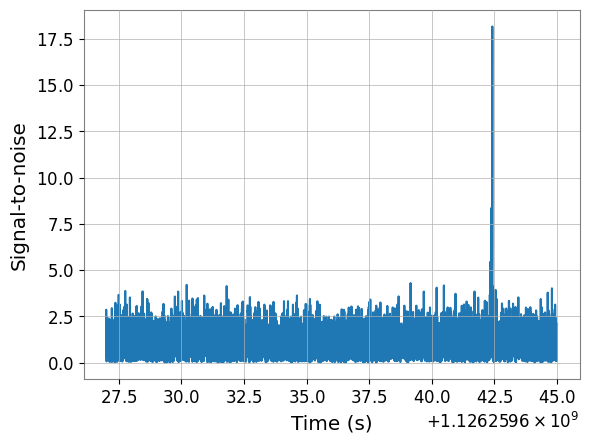

We found a signal at 1126259642.4172363s with SNR 18.17234083996064


In [54]:
from pycbc.filter import matched_filter

snr = matched_filter(template, H1_data,psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for
# so short a template). A longer signal such as from a BNS, would
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be
# anything, we choose to maximize over the phase of the signal.
plt.plot(snr.sample_times, abs(snr))
plt.ylabel('Signal-to-noise')
plt.xlabel('Time (s)')
plt.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
event_time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(event_time,
                                                    abs(snrp)))

In [22]:
# Note that even if the change the masses in the given interval (20 to 50 solar masses), the event time doesn't change significantly
# Only the SNR will change (and it will be maximum for the 'actual' masses)

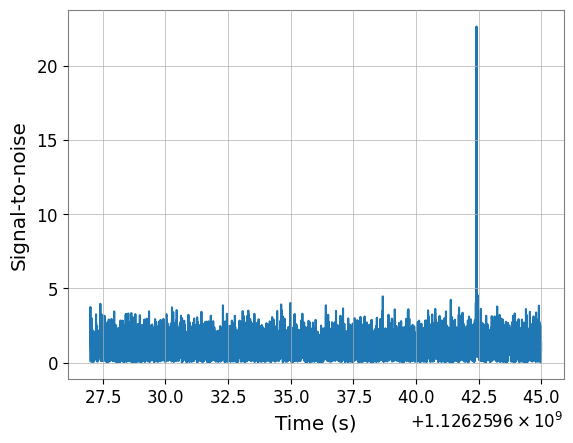

We found a signal at 1126259642.4189453s with SNR 22.66259230729233


In [24]:
# for ex., using different masses -> SNR changes
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=22,
                     mass2=42,
                     delta_t=1/4096,
                     f_lower=20)
hp.resize(len(H1_data))

template = hp.cyclic_time_shift(hp.start_time)

snr = matched_filter(template, H1_data,psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

plt.plot(snr.sample_times, abs(snr))
plt.ylabel('Signal-to-noise')
plt.xlabel('Time (s)')
plt.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]

print("We found a signal at {}s with SNR {}".format(snr.sample_times[peak],
                                                    abs(snrp)))


In [28]:
# We now calculate the PSD from the data

In [29]:
# For this, we separate the strain data into two intervals, one containing the signal and another not containing the signal and compare PSD for both
# total length of data
print(len(H1_data))
print(len(L1_data))
print(len(V1_data))


122880
122880
122880


In [36]:

# From the signal time, we know that the signal lies in the seconf half. Therefore, we seperate the time interval into two halves of 15 seconds each
H1_data = TimeSeries(H1_data, sample_rate=4096) # converting back to gwpy timeseries

H1_psd_data = H1_data[0:61440]
L1_psd_data = L1_data[0:61440]
V1_psd_data = V1_data[0:61440]
H1_signal_data = H1_data[61440:]
L1_signal_data = H1_data[61440:]
V1_signal_data = H1_data[61440:]

In [38]:
H1_signal_data = TimeSeries(H1_signal_data, sample_rate=4096)
H1.set_strain_data_from_gwpy_timeseries(H1_signal_data)

In [39]:
duration = 15
psd_duration = 15
psd_alpha = 2 * H1.strain_data.roll_off / duration
H1_psd_new = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")
L1_psd_new = L1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")
V1_psd_new = V1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [43]:
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd_new.frequencies.value, psd_array=H1_psd_new.value)
L1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=L1_psd_new.frequencies.value, psd_array=L1_psd_new.value)
V1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=V1_psd_new.frequencies.value, psd_array=V1_psd_new.value)

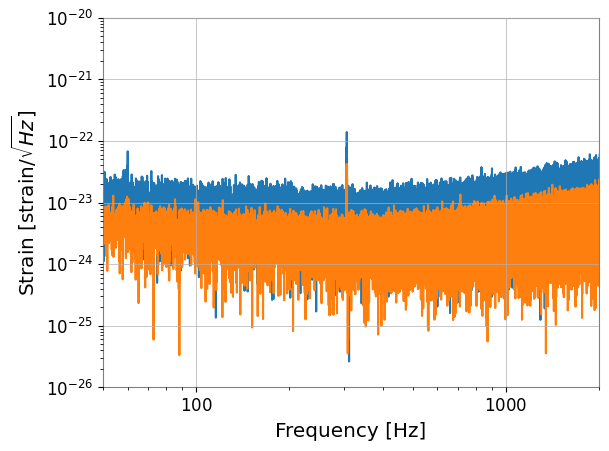

In [44]:
fig, ax = plt.subplots()

ax.loglog(H1.strain_data.frequency_array,
          np.abs(H1.strain_data.frequency_domain_strain))
# ax.loglog(H1.strain_data.frequency_array,np.sqrt(H1_psd_new.value))
ax.loglog(H1.power_spectral_density.frequency_array,
           H1.power_spectral_density.asd_array)
ax.set_xlabel("Frequency [Hz]")
ax.set_xlim(50,2000)
ax.set_ylim(1e-26, 1e-20)
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()



In [ ]:
# We now use bilby for paramter estimation
# Since run_sampler was taking long to run, this part was coded offline and run on the local machine
# The script 210260038_code_Part2_PE.py was run for parameter estimation and the results were saved in 'posterior.csv'
# The results have been analyzed in 210260038_code_Part3_results.ipynb 